In [1]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import run_models

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")  

In [11]:
# initialize class 
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()
# load eyetracking
df_eye = data.load_eye(data_type='events')
# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [12]:
df_eye

,Unnamed: 0,peak_velocity,amplitude,dispersion,start_gx,start_gy,end_gx,end_gy,timestamp,surface,...,block_iter,exp_event,task,event_type,run_num,subtract,onset_sec,subj,sess,start_time
0,1025,NaN,NaN,0.186046,NaN,NaN,NaN,NaN,173,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,0,sSE,1,0.0
1,1026,NaN,NaN,0.253333,NaN,NaN,NaN,NaN,173,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,0,sSE,1,0.0
2,1027,NaN,NaN,0.251370,NaN,NaN,NaN,NaN,173,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,0,sSE,1,0.0
3,1028,NaN,NaN,0.258219,NaN,NaN,NaN,NaN,173,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,0,sSE,1,0.0
4,1029,NaN,NaN,0.244066,NaN,NaN,NaN,NaN,173,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,0,sSE,1,0.0
5,1033,NaN,NaN,0.241322,NaN,NaN,NaN,NaN,174,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,1,sSE,1,0.0
6,1034,NaN,NaN,0.226823,NaN,NaN,NaN,NaN,174,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,1,sSE,1,0.0
7,1035,NaN,NaN,0.185738,NaN,NaN,NaN,NaN,174,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,1,sSE,1,0.0
8,1036,NaN,NaN,0.277390,NaN,NaN,NaN,NaN,174,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,1,sSE,1,0.0
9,1040,NaN,NaN,0.272748,NaN,NaN,NaN,NaN,175,unknown,...,1,"starting task for social_prediction, block:1, ...",social_prediction,task_start,1,173,2,sSE,1,2.5


fitting context model for sON
fitting context model for sEA
fitting context model for sAA1
fitting context model for sHU
fitting context model for sEH
fitting context model for sSE
fitting context model for sEO
fitting context model for sAA
fitting context model for sEE
fitting context model for sML
fitting context model for sIU1
fitting context model for sIU
error raised when fitting eye-tracking model for sON
error raised when fitting eye-tracking model for sEA
error raised when fitting eye-tracking model for sAA1
fitting eye-tracking model for sHU
fitting eye-tracking model for sEH
fitting eye-tracking model for sSE
fitting eye-tracking model for sEO
fitting eye-tracking model for sAA
fitting eye-tracking model for sEE
fitting eye-tracking model for sML
fitting eye-tracking model for sIU1
fitting eye-tracking model for sIU
fitting eye-tracking + context model for sON
fitting eye-tracking + context model for sEA
fitting eye-tracking + context model for sAA1
fitting eye-tracking + con

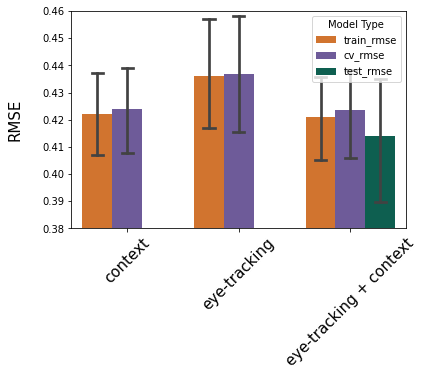

ValueError: too many values to unpack (expected 2)

In [13]:
# run models

# NOTE:
# model functions have been saved in modeling.py and the high-level model routine has been saved in run_models.py
# to modify the models, go to get_model_features in modelling.py and hardcode in new model features

fig, models = run_models.run(dataframe=df_merged,
              model_names=['context', 'eye-tracking', 'eye-tracking + context'])

fig